In [1]:
import rasterio
import rasterio.plot
import matplotlib.pyplot as plt
from collections import OrderedDict
import geojson
import json
from myutil import rasterio_as_image


%matplotlib widget

Image extent: (279512.9999184428, 286680.99991731404, 693504.00010752, 698880.0001066735)
Image shape: (512, 768, 3)


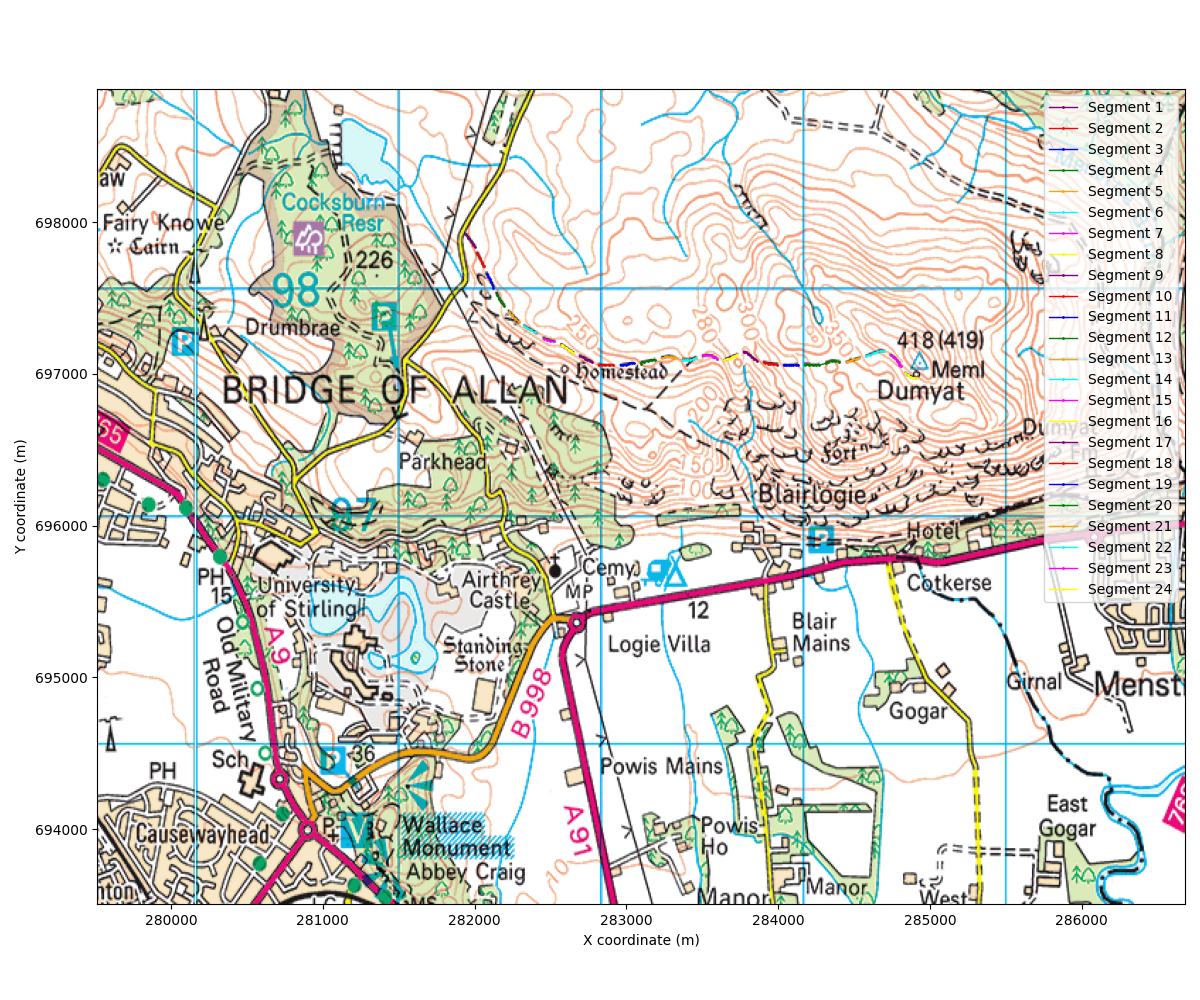


Number of segments: 24


In [2]:
with open("maps/dumyat_landranger.geojson", "r") as f:
    feature = geojson.load(f)

with rasterio.open("maps/dumyat_landranger.tif") as src:
    im = rasterio_as_image(src)
    extent = rasterio.plot.plotting_extent(src)

    print(f"Image extent: {extent}")
    print(f"Image shape: {im.shape}")

    # Create plot
    fig, ax = plt.subplots(figsize=(12, 10))
    ax.imshow(im, extent=extent)

    # Plot the GeoJSON lines
    multilinestring = feature["geometry"]
    colors = ["purple", "red", "blue", "green", "orange", "cyan", "magenta", "yellow"]

    # Collect all segment coordinates to find bounding box
    all_xs = []
    all_ys = []

    for idx, line in enumerate(multilinestring["coordinates"]):
        xs = []
        ys = []
        for point in line:
            xs.append(point[0])
            ys.append(point[1])

        all_xs.extend(xs)
        all_ys.extend(ys)

        ax.plot(
            xs,
            ys,
            "o-",
            color=colors[idx % len(colors)],
            linewidth=1,
            markersize=1,
            label=f"Segment {idx+1}",
        )

    ax.set_xlabel("X coordinate (m)")
    ax.set_ylabel("Y coordinate (m)")
    ax.legend()
    ax.set_aspect("equal")
    plt.tight_layout()
    plt.show()

print(f"\nNumber of segments: {len(multilinestring['coordinates'])}")